In [49]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

import torch

import torch.nn.functional as F
import torch.optim as optim

from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import pandas as pd

import math
import cv2
import re

In [50]:
files = [open('all_train.txt', 'r'), open('all_test1.txt', 'r'), open('all_test2.txt', 'r')]

In [51]:
lable_dic = {'straight' : 0, 'up':1, 'left': 2, 'right': 3}

X_l = []
y_l = []
for file in files:
    paths = []
    y = []
    for line in file.readlines():
        path = '.'
        for s in line[:-1].split('/')[-3:]:
            path += '/'+ s
        paths.append(path)

        lable = line.split('_')[1]
        y.append(lable_dic[lable])

    x = []
    for path in paths:
        img = cv2.imread(path, 0).flatten()
        x.append(img)
    x = np.array(x)
    
    X_l.append(x)
    y_l.append(y)

In [52]:
X_t_l = []
y_t_l = []
for X,y in zip(X_l,y_l):
    X_t, y_t = map(torch.tensor, (X, y))
    X_t = X_t.type(torch.float)
    X_t = X_t/255
    y_t = y_t.type(torch.long)
    
    X_t_l.append(X_t)
    y_t_l.append(y_t)

In [53]:
x_train, x_test_1, x_test_2 = X_t_l
y_train, y_test_1, y_test_2 = y_t_l

In [54]:
train = TensorDataset(x_train, y_train)

In [55]:
train_loader = DataLoader(train, batch_size=120, shuffle=True)

In [56]:
class Net(nn.Module):
    def __init__(self, unit=3):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(960,unit)
        self.fc2 = nn.Linear(unit,4)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return F.sigmoid(x)
    
model = Net()

In [57]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.3, momentum = 0.3)

hidden_weight_l = []
for epoch in range(100):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        hidden_weight_l.append([float(i[0]) for i in model.fc2.weight])
        # 계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)
        # 경사 초기화
        optimizer.zero_grad()
        # 순전파 계산
        output = model(train_x)
        # 오차계산
        loss = criterion(output, train_y)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
        
    if (epoch+1)%10 == 0:
        print(epoch+1, total_loss)

/Users/hyunwoo/anaconda3/envs/optlab/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


10 tensor(3.7236)
20 tensor(3.4384)
30 tensor(3.2277)
40 tensor(3.0178)
50 tensor(2.9339)
60 tensor(2.8250)
70 tensor(2.7633)
80 tensor(2.6572)
90 tensor(2.6609)
100 tensor(2.5883)


In [58]:
x_test_1, y_test_1 = Variable(x_test_1), Variable(y_test_1)

In [59]:
result = torch.max(model(x_test_1).data, 1)[1]

In [60]:
x_test_1.shape

torch.Size([139, 960])

In [61]:
result

tensor([1, 2, 2, 3, 3, 0, 2, 0, 0, 1, 3, 2, 1, 1, 0, 1, 3, 3, 0, 0, 2, 1, 1, 2,
        3, 1, 2, 0, 1, 2, 3, 0, 1, 0, 3, 0, 0, 3, 0, 2, 0, 3, 2, 0, 2, 0, 1, 2,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 3, 1, 1, 3, 2, 2, 1, 1, 1, 1,
        3, 1, 3, 2, 1, 1, 0, 3, 3, 2, 1, 1, 2, 3, 0, 1, 1, 0, 3, 2, 3, 2, 3, 1,
        1, 2, 3, 0, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 3, 3, 1, 3, 2, 2, 1, 3, 2, 1,
        1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1])

In [62]:
y_test_1

tensor([1, 1, 2, 3, 3, 0, 2, 0, 0, 1, 3, 2, 0, 0, 0, 1, 3, 1, 0, 0, 2, 1, 1, 2,
        3, 1, 2, 0, 0, 2, 3, 1, 1, 0, 1, 0, 3, 3, 1, 2, 0, 3, 2, 0, 1, 1, 1, 2,
        0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 3, 0, 1, 3, 2, 2, 1, 1, 3, 1,
        3, 1, 3, 2, 0, 1, 0, 3, 3, 2, 1, 1, 0, 3, 0, 1, 1, 0, 3, 2, 3, 2, 3, 1,
        1, 2, 3, 0, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 3, 3, 0, 3, 2, 2, 1, 3, 2, 0,
        1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1])

# Assignment 1

In [63]:
accuracy = sum(y_test_1.data.numpy() == result.numpy()) / len(y_test_1.data.numpy())

In [64]:
accuracy

0.841726618705036

# Assignment 2

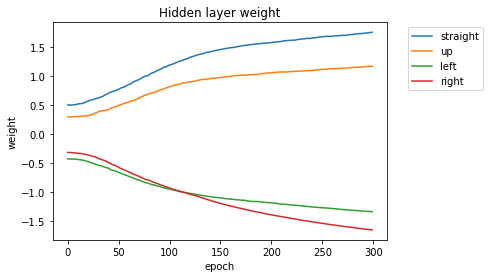

In [65]:
for i in range(4):
    plt.plot([step[i] for step in hidden_weight_l], label=f'{list(lable_dic.keys())[i]}')
    
plt.title('Hidden layer weight')
plt.ylabel('weight')
plt.xlabel('epoch')
pyplot.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

# Assignment 3

In [66]:
model_30 = Net(30)

In [67]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_30.parameters(), lr=0.3, momentum = 0.3)

hidden_weight_l_30 = []
for epoch in range(100):
    total_loss = 0
    
    hidden_weight_l_30.append([float(i[0]) for i in model_30.fc2.weight])

    for train_x, train_y in train_loader:
        # 계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)
        # 경사 초기화
        optimizer.zero_grad()
        # 순전파 계산
        output = model_30(train_x)
        # 오차계산
        loss = criterion(output, train_y)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
        
    if (epoch+1)%10 == 0:
        print(epoch+1, total_loss)

/Users/hyunwoo/anaconda3/envs/optlab/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


10 tensor(3.8657)
20 tensor(3.4353)
30 tensor(3.1529)
40 tensor(2.9456)
50 tensor(2.8130)
60 tensor(2.6857)
70 tensor(2.6331)
80 tensor(2.6253)
90 tensor(2.5963)
100 tensor(2.5087)


In [68]:
x_test_1, y_test_1 = Variable(x_test_1), Variable(y_test_1)

In [69]:
result = torch.max(model_30(x_test_1).data, 1)[1]

In [70]:
accuracy = sum(y_test_1.data.numpy() == result.numpy()) / len(y_test_1.data.numpy())

In [71]:
accuracy

0.8705035971223022

### How to select the final network over a number of gradient descent iterations?
=> 매 iteration마다 validation set에 대한 accuracy를 확인한다?

In [81]:
model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.3, momentum = 0.3)

x_test_1, y_test_1 = Variable(x_test_1), Variable(y_test_1)

accuracy_l = []
loss_l = []

for epoch in range(300):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        # 계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)
        # 경사 초기화
        optimizer.zero_grad()
        # 순전파 계산
        output = model(train_x)
        # 오차계산
        loss = criterion(output, train_y)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
    
    result = torch.max(model(x_test_1).data, 1)[1]
    accuracy = sum(y_test_1.data.numpy() == result.numpy()) / len(y_test_1.data.numpy())
    accuracy_l.append(accuracy)
    loss_l.append(total_loss)
    
    if (epoch+1)%10 == 0:
        print(epoch+1, total_loss)

/Users/hyunwoo/anaconda3/envs/optlab/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


10 tensor(3.9167)
20 tensor(3.6186)
30 tensor(3.4569)
40 tensor(3.2265)
50 tensor(3.0850)
60 tensor(2.9652)
70 tensor(2.8727)
80 tensor(2.7853)
90 tensor(2.7618)
100 tensor(2.6976)
110 tensor(2.6804)
120 tensor(2.6444)
130 tensor(2.6104)
140 tensor(2.6166)
150 tensor(2.6198)
160 tensor(2.5722)
170 tensor(2.5600)
180 tensor(2.5744)
190 tensor(2.5675)
200 tensor(2.5476)
210 tensor(2.5350)
220 tensor(2.5284)
230 tensor(2.5125)
240 tensor(2.5387)
250 tensor(2.5122)
260 tensor(2.5111)
270 tensor(2.5129)
280 tensor(2.4915)
290 tensor(2.4883)
300 tensor(2.5253)


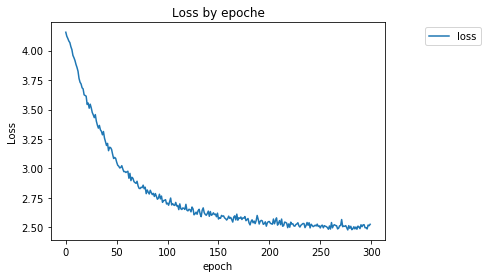

In [82]:
plt.title('Loss by epoche')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.plot(loss_l, label='loss')

pyplot.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

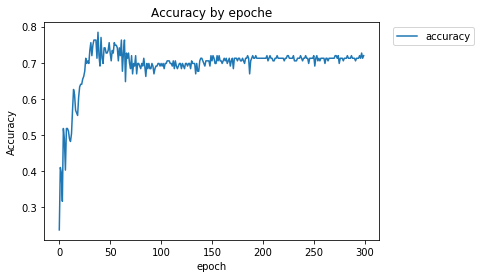

In [83]:
plt.title('Accuracy by epoche')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.plot(accuracy_l, label='accuracy')

pyplot.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

In [84]:
max(accuracy_l)

0.7841726618705036